# Settings

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [4]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive/MyDrive/COLAB/tensorflow/1_Intro

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/COLAB/tensorflow/1_Intro


# Input preprocessing

In [5]:
#Load Data and review content
df_iris = pd.read_csv("iris.csv")

print("\nLoaded Data :\n------------------------------------")
print(df_iris.head())

# Use a Label encoder to convert String to numeric values for the target variable
label_encoder = LabelEncoder()
df_iris['Species'] = label_encoder.fit_transform(df_iris['Species'])

# Convert input to numpy array
np_iris = df_iris.to_numpy()

# Separate feature and target variables
X_data = np_iris[:,0:4]
Y_data=np_iris[:,4]

print("\nFeatures before scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget before scaling :\n------------------------------------")
print(Y_data[:5])

# Create a scaler model that is fit on the input data.
scaler = StandardScaler().fit(X_data)

#Scale the numeric feature variables
X_data = scaler.transform(X_data)

# Convert target variable as a one-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,3)

print("\nFeatures after scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget after one-hot-encoding :\n------------------------------------")
print(Y_data[:5,:])

# Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10)

print("\nTrain Test Dimensions:\n------------------------------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Loaded Data :
------------------------------------
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Features before scaling :
------------------------------------
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target before scaling :
------------------------------------
[0. 0. 0. 0. 0.]

Features after scaling :
------------------------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]

Targe

# Model

In [ ]:
NB_CLASSES = 3

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128, input_shape=(4,), name='Hidden-Layer-1', activation='relu'))
model.add(tf.keras.layers.Dense(128, name='Hidden-Layer-2', activation='relu'))
model.add(tf.keras.layers.Dense(NB_CLASSES, name='Output-Layer', activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


# Training and Evaluating

Epoch 1/10
7/7 [==============================] - 3s 94ms/step - loss: 0.7824 - accuracy: 0.6574 - val_loss: 0.6634 - val_accuracy: 0.6296
Epoch 2/10
7/7 [==============================] - 0s 11ms/step - loss: 0.5124 - accuracy: 0.7685 - val_loss: 0.5208 - val_accuracy: 0.8519
Epoch 3/10
7/7 [==============================] - 0s 16ms/step - loss: 0.4208 - accuracy: 0.8241 - val_loss: 0.4369 - val_accuracy: 0.8519
Epoch 4/10
7/7 [==============================] - 0s 15ms/step - loss: 0.3612 - accuracy: 0.8333 - val_loss: 0.3777 - val_accuracy: 0.8889
Epoch 5/10
7/7 [==============================] - 0s 22ms/step - loss: 0.3270 - accuracy: 0.8519 - val_loss: 0.3286 - val_accuracy: 0.9259
Epoch 6/10
7/7 [==============================] - 0s 16ms/step - loss: 0.2914 - accuracy: 0.8611 - val_loss: 0.2844 - val_accuracy: 0.9259
Epoch 7/10
7/7 [==============================] - 0s 11ms/step - loss: 0.2743 - accuracy: 0.8611 - val_loss: 0.2541 - val_accuracy: 0.9259
Epoch 8/10
7/7 [===========

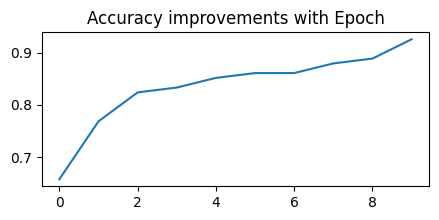


Evaluation against Test Dataset :
------------------------------------
1/1 [==============================] - 0s 104ms/step - loss: 0.3264 - accuracy: 0.8667


[0.3263554275035858, 0.8666666746139526]

In [ ]:
VERBOSE = 1
BATCH_SIZE = 16
EPOCHS = 10
VALIDATION_SPLIT = 0.2

history = model.fit(
    X_train, Y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=VERBOSE,
    validation_split=VALIDATION_SPLIT
)

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(5, 2))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

# Saving and Loading Models

In [ ]:
#Saving a model
model.save("iris_save") # model saved as a directory
#Loading a Model
loaded_model = tf.keras.models.load_model("iris_save")
#Print Model Summary
loaded_model.summary()

!rm -rf iris_save

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


# Prediction

In [ ]:
#Raw prediction data
prediction_input = [[6.6, 3. , 4.4, 1.4]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 159ms/step
Raw Prediction Output (Probabilities) : [[0.01908357 0.6002268  0.38068962]]
Prediction is  ['versicolor']
